In [1]:
# canonical import
import pandas as pd

# importing data and dropping na

In [4]:
from google.colab import files
uploaded = files.upload()

Saving GME.csv to GME.csv


In [3]:
reddit_df = pd.read_csv('reddit_with_sentiments_finbert.csv')
reddit_df = reddit_df.dropna()


In [5]:
gme_df = pd.read_csv('GME.csv')
gme_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       253 non-null    object 
 1   Open       253 non-null    float64
 2   High       253 non-null    float64
 3   Low        253 non-null    float64
 4   Close      253 non-null    float64
 5   Adj Close  253 non-null    float64
 6   Volume     253 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


In [6]:
gme_df['Date'].nunique()

253

In [7]:
reddit_df

,Unnamed: 0,title,score,id,url,comms_num,created,body,timestamp,body_unidecode,title_unidecode,stock_body,stock_title,body_size,title_sentiment_fin,body_sentiment
4,12,"Once you're done with GME - $AG and $SLV, the ...",0,l6u9wu,https://www.reddit.com/r/wallstreetbets/commen...,16,1.611861e+09,You guys are champs. GME... who would have tho...,2021-01-28 21:17:10,You guys are champs. GME... who would have tho...,"Once you're done with GME - $AG and $SLV, the ...",GME,GME,260,neutral,neutral
5,13,$GME price has nothing to do with fundamentals...,382,l6u96y,https://www.reddit.com/r/wallstreetbets/commen...,61,1.611861e+09,"Firstly, all of you diamond hands and smooth-b...",2021-01-28 21:15:58,"Firstly, all of you diamond hands and smooth-b...",$GME price has nothing to do with fundamentals...,GME,GME,946,neutral,neutral
7,35,My brokerage wants to force close my GME calls,560,l6te9s,https://www.reddit.com/r/wallstreetbets/commen...,215,1.611858e+09,My brokerage called me and asked me to close m...,2021-01-28 20:18:32,My brokerage called me and asked me to close m...,My brokerage wants to force close my GME calls,GME,GME,248,negative,neutral
10,46,"The real price for GME is infinity, but at tha...",235,l6t34h,https://www.reddit.com/r/wallstreetbets/commen...,120,1.611857e+09,"Lets imagine GME has gone to 50,000. The marke...",2021-01-28 19:57:53,"Lets imagine GME has gone to 50,000. The marke...","The real price for GME is infinity, but at tha...",GME,GME,206,neutral,neutral
18,67,Help an NRI (Indian) get on board the GME spac...,70,l6s977,https://www.reddit.com/r/wallstreetbets/commen...,74,1.611853e+09,"Hello guys, \n\nI am new to the subreddit and ...",2021-01-28 19:00:16,"Hello guys, \n\nI am new to the subreddit and ...",Help an NRI (Indian) get on board the GME spac...,GME,GME,101,neutral,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6820,50107,"Daily option statistics for WISH, CLOV, TSLA, ...",545,o7e1pj,https://www.reddit.com/r/wallstreetbets/commen...,149,1.624615e+09,"Hey everyone,\n\nHere is the daily option stat...",2021-06-25 13:00:17,"Hey everyone,\n\nHere is the daily option stat...","Daily option statistics for WISH, CLOV, TSLA, ...",GME,GME,120,neutral,neutral
6824,50243,"Short Analysis for $WISH, $CLOV, $UWMC, $SPCE,...",769,o6rr8z,https://www.reddit.com/r/wallstreetbets/commen...,302,1.624531e+09,This post provides an updated snapshot of the ...,2021-06-24 13:34:13,This post provides an updated snapshot of the ...,"Short Analysis for $WISH, $CLOV, $UWMC, $SPCE,...",GME,GME,198,neutral,neutral
6825,50245,"Daily option statistics for CLOV, WISH, AMC, W...",524,o6rcv1,https://www.reddit.com/r/wallstreetbets/commen...,149,1.624529e+09,"Hey guys, \n\nSorry for the delay. I have been...",2021-06-24 13:10:03,"Hey guys, \n\nSorry for the delay. I have been...","Daily option statistics for CLOV, WISH, AMC, W...",GME,GME,135,neutral,neutral
6830,50452,"Daily options statistics for WISH, CLOV, AMC, ...",945,o5vyg0,https://www.reddit.com/r/wallstreetbets/commen...,315,1.624421e+09,"Hey guys,\n\nIts time for the daily option sta...",2021-06-23 07:04:52,"Hey guys,\n\nIts time for the daily option sta...","Daily options statistics for WISH, CLOV, AMC, ...",GME,GME,158,neutral,neutral


'2021-01-28 21:17:10'

In [8]:
sentiment_df=pd.DataFrame()

In [9]:
def classifying_sentiments(x):
  if x =='positive':
    return 1
  if x =='neutral':
    return 0
  return -1

In [12]:
reddit_df['classifying_sentiments_title'] = reddit_df['title_sentiment_fin'].map(lambda x: classifying_sentiments(x))
reddit_df['classifying_sentiments_body'] = reddit_df['body_sentiment'].map(lambda x: classifying_sentiments(x))

In [13]:
#from datetime import datetime
reddit_df['day'] = reddit_df['timestamp'].map(lambda x: x.split(" ")[0])
reddit_df['hour'] = reddit_df['timestamp'].map(lambda x: x.split(" ")[1])

In [14]:
import numpy as np
reddit_df.groupby('day').agg({'score': [np.sum, np.mean], 'classifying_sentiments_title':[np.sum, np.mean]})

score              classifying_sentiments_title          
               sum         mean                          sum      mean
day                                                                   
2021-01-28   19641   338.637931                           -3 -0.051724
2021-01-29  302906   535.169611                          -47 -0.083039
2021-01-30  319377  3397.627660                           -9 -0.095745
2021-01-31  243896  2622.537634                           -5 -0.053763
2021-02-01  179067  2487.041667                           -7 -0.097222
...            ...          ...                          ...       ...
2021-06-22     501   501.000000                            0  0.000000
2021-06-23     945   945.000000                            0  0.000000
2021-06-24    1293   646.500000                            0  0.000000
2021-06-25     545   545.000000                            0  0.000000
2021-06-26     309   309.000000                            0  0.000000

[98 rows x 4 columns]

In [15]:
reddit_df['datetime'] = pd.to_datetime(reddit_df['timestamp'])

In [16]:
reddit_df['day'] = reddit_df['datetime'].dt.date

In [17]:
from datetime import datetime
reddit_df['day'] = reddit_df['timestamp'].map(lambda x: datetime.strptime(x,'%y-%m-%d %H:%M:%S'))
#date_time_obj = datetime. strptime(date_time_str, '%d/%m/%y %H:%M:%S')

ValueError: ignored

In [18]:
reddit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 4 to 6835
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Unnamed: 0                    2159 non-null   int64         
 1   title                         2159 non-null   object        
 2   score                         2159 non-null   int64         
 3   id                            2159 non-null   object        
 4   url                           2159 non-null   object        
 5   comms_num                     2159 non-null   int64         
 6   created                       2159 non-null   float64       
 7   body                          2159 non-null   object        
 8   timestamp                     2159 non-null   object        
 9   body_unidecode                2159 non-null   object        
 10  title_unidecode               2159 non-null   object        
 11  stock_body                    

In [19]:
reddit_df['time'] = reddit_df['datetime'].dt.time

In [20]:
reddit_df['time']

4       21:17:10
5       21:15:58
7       20:18:32
10      19:57:53
18      19:00:16
          ...   
6820    13:00:17
6824    13:34:13
6825    13:10:03
6830    07:04:52
6835    07:02:45
Name: time, Length: 2159, dtype: object

In [23]:
#datetime.strptime(reddit_df['hour'][4], "%H:%M:%S") > datetime.datetime.strptime(hora, "%H:%M:%S")
#pd.datetime.time(pd.datetime(hora))

AttributeError: ignored

In [21]:
datetime.strptime(reddit_df['hour'][4], "%H:%M:%S") > datetime.datetime.strptime(hora, "%H:%M:%S")
#pd.datetime.time(pd.datetime(hora))

AttributeError: ignored

In [27]:
#time_string = "09:29:59"

In [22]:
import datetime
from datetime import timedelta

In [23]:
time_string = "09:29:59"
hora_fim = datetime.datetime.strptime(time_string, "%H:%M:%S")

In [24]:
#datetime.datetime.strptime(reddit_df['time'], "%H:%M:%S")
reddit_df['time']=reddit_df['time'].apply(lambda x:datetime.datetime.strptime(str(x),"%H:%M:%S"))

In [25]:
reddit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 4 to 6835
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Unnamed: 0                    2159 non-null   int64         
 1   title                         2159 non-null   object        
 2   score                         2159 non-null   int64         
 3   id                            2159 non-null   object        
 4   url                           2159 non-null   object        
 5   comms_num                     2159 non-null   int64         
 6   created                       2159 non-null   float64       
 7   body                          2159 non-null   object        
 8   timestamp                     2159 non-null   object        
 9   body_unidecode                2159 non-null   object        
 10  title_unidecode               2159 non-null   object        
 11  stock_body                    

In [26]:
reddit_df['datetime']- timedelta(days=1)

4      2021-01-27 21:17:10
5      2021-01-27 21:15:58
7      2021-01-27 20:18:32
10     2021-01-27 19:57:53
18     2021-01-27 19:00:16
               ...        
6820   2021-06-24 13:00:17
6824   2021-06-23 13:34:13
6825   2021-06-23 13:10:03
6830   2021-06-22 07:04:52
6835   2021-06-21 07:02:45
Name: datetime, Length: 2159, dtype: datetime64[ns]

In [27]:
reddit_df.loc[(reddit_df['time']<hora_fim),'datetime']#=reddit_df['datetime']-timedelta(days=1)

74     2021-01-28 09:17:32
75     2021-01-28 09:16:00
81     2021-01-28 09:10:11
85     2021-01-28 09:08:18
214    2021-01-29 01:02:55
               ...        
6810   2021-06-19 02:09:36
6814   2021-06-18 07:07:04
6817   2021-06-26 07:54:35
6830   2021-06-23 07:04:52
6835   2021-06-22 07:02:45
Name: datetime, Length: 1309, dtype: datetime64[ns]

In [28]:
#group by por 
#reddit_df['day'] = reddit_df['timestamp'].map(lambda x: x.split(" ")[0])
reddit_day = reddit_df.groupby('day').agg({'score': [np.sum, np.mean], 'classifying_sentiments_title':[np.sum, np.mean]})

In [29]:
reddit_df['datetime']=reddit_df['datetime'].map(lambda x: str(x))
reddit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 4 to 6835
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Unnamed: 0                    2159 non-null   int64         
 1   title                         2159 non-null   object        
 2   score                         2159 non-null   int64         
 3   id                            2159 non-null   object        
 4   url                           2159 non-null   object        
 5   comms_num                     2159 non-null   int64         
 6   created                       2159 non-null   float64       
 7   body                          2159 non-null   object        
 8   timestamp                     2159 non-null   object        
 9   body_unidecode                2159 non-null   object        
 10  title_unidecode               2159 non-null   object        
 11  stock_body                    

In [30]:
gme_df['Date'].value_counts()

2021-07-08    1
2021-04-27    1
2020-08-12    1
2021-01-06    1
2020-10-28    1
             ..
2020-11-19    1
2021-03-09    1
2020-08-06    1
2020-11-23    1
2020-12-02    1
Name: Date, Length: 253, dtype: int64

In [31]:
reddit_df['Date'] =reddit_df['datetime'].map(lambda x: x.split()[0])
reddit_df = reddit_df.merge(gme_df, how='outer', on='Date')


In [127]:
reddit_df.head()

,Unnamed: 0,title,score,id,url,comms_num,created,body,timestamp,body_unidecode,title_unidecode,stock_body,stock_title,body_size,title_sentiment_fin,body_sentiment,classifying_sentiments_title,classifying_sentiments_body,day,hour,datetime,time,Date,Open,High,Low,Close,Adj Close,Volume
0,12.0,"Once you're done with GME - $AG and $SLV, the ...",0.0,l6u9wu,https://www.reddit.com/r/wallstreetbets/commen...,16.0,1.611861e+09,You guys are champs. GME... who would have tho...,2021-01-28 21:17:10,You guys are champs. GME... who would have tho...,"Once you're done with GME - $AG and $SLV, the ...",GME,GME,260.0,neutral,neutral,0.0,0.0,2021-01-28,21:17:10,2021-01-28 21:17:10,1900-01-01 21:17:10,2021-01-28,265.0,483.0,112.25,193.600006,193.600006,58815800.0
1,13.0,$GME price has nothing to do with fundamentals...,382.0,l6u96y,https://www.reddit.com/r/wallstreetbets/commen...,61.0,1.611861e+09,"Firstly, all of you diamond hands and smooth-b...",2021-01-28 21:15:58,"Firstly, all of you diamond hands and smooth-b...",$GME price has nothing to do with fundamentals...,GME,GME,946.0,neutral,neutral,0.0,0.0,2021-01-28,21:15:58,2021-01-28 21:15:58,1900-01-01 21:15:58,2021-01-28,265.0,483.0,112.25,193.600006,193.600006,58815800.0
2,35.0,My brokerage wants to force close my GME calls,560.0,l6te9s,https://www.reddit.com/r/wallstreetbets/commen...,215.0,1.611858e+09,My brokerage called me and asked me to close m...,2021-01-28 20:18:32,My brokerage called me and asked me to close m...,My brokerage wants to force close my GME calls,GME,GME,248.0,negative,neutral,-1.0,0.0,2021-01-28,20:18:32,2021-01-28 20:18:32,1900-01-01 20:18:32,2021-01-28,265.0,483.0,112.25,193.600006,193.600006,58815800.0
3,46.0,"The real price for GME is infinity, but at tha...",235.0,l6t34h,https://www.reddit.com/r/wallstreetbets/commen...,120.0,1.611857e+09,"Lets imagine GME has gone to 50,000. The marke...",2021-01-28 19:57:53,"Lets imagine GME has gone to 50,000. The marke...","The real price for GME is infinity, but at tha...",GME,GME,206.0,neutral,neutral,0.0,0.0,2021-01-28,19:57:53,2021-01-28 19:57:53,1900-01-01 19:57:53,2021-01-28,265.0,483.0,112.25,193.600006,193.600006,58815800.0
4,67.0,Help an NRI (Indian) get on board the GME spac...,70.0,l6s977,https://www.reddit.com/r/wallstreetbets/commen...,74.0,1.611853e+09,"Hello guys, \n\nI am new to the subreddit and ...",2021-01-28 19:00:16,"Hello guys, \n\nI am new to the subreddit and ...",Help an NRI (Indian) get on board the GME spac...,GME,GME,101.0,neutral,neutral,0.0,0.0,2021-01-28,19:00:16,2021-01-28 19:00:16,1900-01-01 19:00:16,2021-01-28,265.0,483.0,112.25,193.600006,193.600006,58815800.0


In [32]:
reddit_day = reddit_df.groupby('Date').agg({'score': [np.sum, np.mean], 'classifying_sentiments_title':[np.sum, np.mean],'Close':np.mean,'Volume':np.mean})
reddit_day

score      classifying_sentiments_title            Close     Volume
             sum mean                          sum mean        mean       mean
Date                                                                          
2020-07-22   0.0  NaN                          0.0  NaN    4.110000  2523500.0
2020-07-23   0.0  NaN                          0.0  NaN    4.110000  3237200.0
2020-07-24   0.0  NaN                          0.0  NaN    4.030000  2215900.0
2020-07-27   0.0  NaN                          0.0  NaN    4.010000  2472700.0
2020-07-28   0.0  NaN                          0.0  NaN    3.940000  4555400.0
...          ...  ...                          ...  ...         ...        ...
2021-07-16   0.0  NaN                          0.0  NaN  169.039993  3278800.0
2021-07-19   0.0  NaN                          0.0  NaN  173.490005  2436900.0
2021-07-20   0.0  NaN                          0.0  NaN  191.179993  3094100.0
2021-07-21   0.0  NaN                          0.0  NaN  185.809998  2225900.0
2021-07-22   0.0  NaN                          0.0  NaN  178.850006  1389308.0

[281 rows x 6 columns]

In [65]:
reddit_day['score_sum']

11281.612099644128

In [33]:
reddit_day.columns = ['_'.join(col) for col in reddit_day.columns]
reddit_day

,score_sum,score_mean,classifying_sentiments_title_sum,classifying_sentiments_title_mean,Close_mean,Volume_mean
Date,,,,,,
2020-07-22,0.0,NaN,0.0,NaN,4.110000,2523500.0
2020-07-23,0.0,NaN,0.0,NaN,4.110000,3237200.0
2020-07-24,0.0,NaN,0.0,NaN,4.030000,2215900.0
2020-07-27,0.0,NaN,0.0,NaN,4.010000,2472700.0
2020-07-28,0.0,NaN,0.0,NaN,3.940000,4555400.0
...,...,...,...,...,...,...
2021-07-16,0.0,NaN,0.0,NaN,169.039993,3278800.0
2021-07-19,0.0,NaN,0.0,NaN,173.490005,2436900.0
2021-07-20,0.0,NaN,0.0,NaN,191.179993,3094100.0


In [81]:
reddit_day.to_csv('reddit_day.csv')

In [136]:
reddit_day.columns = ['_'.join(col) for col in reddit_day.columns]

In [134]:
reddit_day['Close']['mean']

Date
2020-07-22      4.110000
2020-07-23      4.110000
2020-07-24      4.030000
2020-07-27      4.010000
2020-07-28      3.940000
                 ...    
2021-07-16    169.039993
2021-07-19    173.490005
2021-07-20    191.179993
2021-07-21    185.809998
2021-07-22    178.850006
Name: mean, Length: 281, dtype: float64

In [34]:
reddit_day.fillna(-1000,inplace=True)

In [66]:
reddit_df['count'] = 1
reddit_count = reddit_df.groupby('Date').agg({'count': [np.sum]})
reddit_count

,count
,sum
Date,
2020-07-22,1
2020-07-23,1
2020-07-24,1
2020-07-27,1
2020-07-28,1
...,...
2021-07-16,1
2021-07-19,1


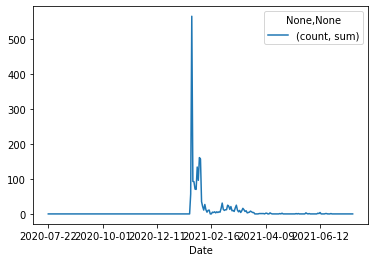

In [82]:
#reddit_count.sort_values(by=reddit_count['count']['sum'],ascending=False)
reddit_count.plot()
times = pd.to_datetime(df.timestamp_col)

In [84]:
reddit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2342 entries, 0 to 2341
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Unnamed: 0                    2159 non-null   float64       
 1   title                         2159 non-null   object        
 2   score                         2159 non-null   float64       
 3   id                            2159 non-null   object        
 4   url                           2159 non-null   object        
 5   comms_num                     2159 non-null   float64       
 6   created                       2159 non-null   float64       
 7   body                          2159 non-null   object        
 8   timestamp                     2159 non-null   object        
 9   body_unidecode                2159 non-null   object        
 10  title_unidecode               2159 non-null   object        
 11  stock_body                    

In [35]:
# Time Serie split
len_ = int(0.8*reddit_day.shape[0])
df_train = reddit_day[:len_]
df_test = reddit_day[len_:]

In [46]:
x_train = df_train.drop(columns=['Close_mean'])
x_test = df_test.drop(columns=['Close_mean'])
y_train=df_train['Close_mean']
y_test=df_test['Close_mean']

In [2]:
np.array(y_target_imputed).shape

NameError: name 'np' is not defined

In [47]:
#scaling
from sklearn.preprocessing import MinMaxScaler
columns = x_train.columns
scaler = MinMaxScaler()
x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train), columns=columns)
x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns=columns)
x_train.head()


,score_sum,score_mean,classifying_sentiments_title_sum,classifying_sentiments_title_mean,Volume_mean
Date,,,,,
2020-07-22,0.0,-1000.0,0.0,-1000.0,2523500.0
2020-07-23,0.0,-1000.0,0.0,-1000.0,3237200.0
2020-07-24,0.0,-1000.0,0.0,-1000.0,2215900.0
2020-07-27,0.0,-1000.0,0.0,-1000.0,2472700.0
2020-07-28,0.0,-1000.0,0.0,-1000.0,4555400.0


In [45]:
x_train_scaled

(224, 5, 1)

In [151]:
x_train_scaled

,score_sum,score_mean,classifying_sentiments_title_sum,classifying_sentiments_title_mean,Volume_mean
0,0.0,0.000000,0.959184,0.000000,0.012804
1,0.0,0.000000,0.959184,0.000000,0.016424
2,0.0,0.000000,0.959184,0.000000,0.011244
3,0.0,0.000000,0.959184,0.000000,0.012547
4,0.0,0.000000,0.959184,0.000000,0.023110
...,...,...,...,...,...
219,0.0,0.000000,0.959184,0.000000,0.026689
220,0.0,0.000000,0.959184,0.000000,0.020331
221,0.0,0.000000,0.959184,0.000000,0.014234
222,0.0,0.079487,0.959184,0.999334,0.014931


In [57]:
#2 rnn 
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

def init_model():
    
    model = models.Sequential()
    model.add(layers.Masking(mask_value=-1000.))
    model.add(layers.LSTM(20, return_sequences=True, activation='tanh'))
    model.add(layers.LSTM(10, return_sequences=False, activation='tanh'))
    model.add(layers.Dense(5, activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    
  #  model.compile(loss='mse', 
  #                optimizer='rmsprop', 
  #                metrics=['mae'])
    model.compile(loss='mse', 
                  optimizer=RMSprop(learning_rate=0.0003), 
                  metrics=['mae'])
    
    return model

#init_model().summary()

ValueError: ignored

In [49]:
type(x_train_scaled)

numpy.ndarray

In [166]:
x_train_scaled = np.array(x_train_scaled)

In [48]:
x_train_scaled = np.expand_dims(x_train_scaled,2)

In [50]:
x_train_scaled

array([[[0.        ],
        [0.        ],
        [0.95918367],
        [0.        ],
        [0.01280439]],

       [[0.        ],
        [0.        ],
        [0.95918367],
        [0.        ],
        [0.01642432]],

       [[0.        ],
        [0.        ],
        [0.95918367],
        [0.        ],
        [0.01124423]],

       ...,

       [[0.        ],
        [0.        ],
        [0.95918367],
        [0.        ],
        [0.0142342 ]],

       [[0.        ],
        [0.07948704],
        [0.95918367],
        [0.99933378],
        [0.0149311 ]],

       [[0.        ],
        [0.        ],
        [0.95918367],
        [0.        ],
        [0.01488951]]])

In [58]:
model=init_model()

In [59]:
model.fit(x_train_scaled,y_train)

7/7 [==============================] - 12s 8ms/step - loss: 111720.9453 - mae: 159.3691


In [60]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking_6 (Masking)          (32, 5, 1)                0         
_________________________________________________________________
lstm_12 (LSTM)               (32, 5, 20)               1760      
_________________________________________________________________
lstm_13 (LSTM)               (32, 10)                  1240      
_________________________________________________________________
dense_12 (Dense)             (32, 5)                   55        
_________________________________________________________________
dense_13 (Dense)             (32, 1)                   6         
Total params: 3,061
Trainable params: 3,061
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from pytrends.request import TrendReq
pytrends = TrendReq(hl='en-US', tz=360)


In [ ]:
# DO NOT DESTROY THIS CELLL

# " ".join(reddit_df.iloc[23594]['body'].split()[0:427])
# " ".join(reddit_df.iloc[23594]['body'].split()[427:-1])
# print(classifier(" ".join(reddit_df.iloc[23594]['body'].split()[0:427])))
# print(classifier(" ".join(reddit_df.iloc[23594]['body'].split()[-370:-1])))

# " ".join(reddit_df.iloc[23594]['body'].split()[-370:-1])
